### Gold Price Prediction

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


About Dataset
Data set column

Date - mm/dd/yyyy
SPX - is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in the United States.
GLD - Gold Price
USO - United States Oil Fund
SLV - Silver Price
EUR/USD - currency pair quotation of the Euro against the US


In [3]:
#importing dependancies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Data Collection and Preprocessing

In [4]:
gold_data=pd.read_csv('/content/drive/MyDrive/rini_datascience/gold price/gld_price_data.csv')

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.shape

(2290, 6)

In [8]:
#checking for null values
gold_data.isnull().mean()

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

Correlation
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr()

<ipython-input-9-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

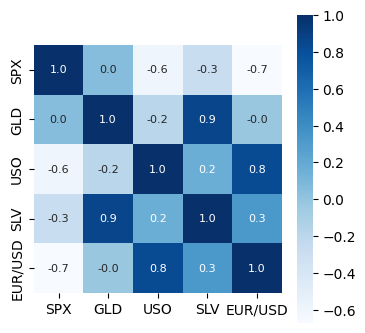

In [10]:
plt.figure(figsize = (4,4))
sns.heatmap(correlation, cbar=True, square=True,
            fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
gold_data=gold_data.drop(columns='Date',axis=1)

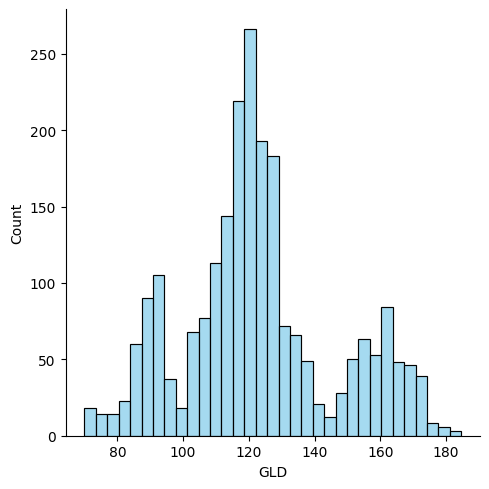

In [12]:
sns.displot(gold_data['GLD'],color='skyBlue')

## Spliting the data into Test and Train data

In [13]:
x = gold_data.drop(['GLD'],axis=1)
y = gold_data['GLD']

In [14]:
scaler=StandardScaler()

In [15]:
#standardizing the data
x=scaler.fit_transform(x)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=52)

In [17]:
regressor = RandomForestRegressor(n_estimators=120)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=120)

## Prediction

In [18]:
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)

[118.99874947 117.72191502 160.02925018 117.87874994 105.50633352
 128.82875094  86.23591493  92.55508223 157.17025142 118.92341486
 111.67324988 163.7447489   87.22499797  87.60924908 115.22708267
 126.33233415  85.84449982 141.4053338   93.04158375 109.12416617
 145.47766823  90.71458428 124.85599981 135.11049825 124.14133274
 118.50566792 120.71641706  89.45408198 104.03783336 177.15225262
 111.86400018 107.1568338  111.18333263 128.48024907 116.98741664
 120.43016639 160.98591447 119.94841558 155.0752502  121.45666588
 114.3124988   91.44899959 113.11558293 120.27799945 112.45225068
  91.76766816 130.20666581 128.97466835  88.29399957 176.78999714
 121.29775104 130.37416694 131.61375327 117.17641741 155.84583343
 139.33366582 114.55833247 159.334999   136.73858025 167.70274853
  93.82800087 106.01491738 132.04650006 102.00558393 156.987252
 127.19891528 118.23508308 122.79433228 132.97666838 160.69124813
 125.83475015  71.68750122  91.42449983 124.72083247 107.18091633
 104.5481658

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, test_data_prediction))
print(mean_squared_error(y_test, test_data_prediction))

1.298162657678315
3.687775547366565


In [19]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print(f"R squared error: {error_score} ")

R squared error: 0.9932508581583545 


In [20]:
y_test = list(y_test)

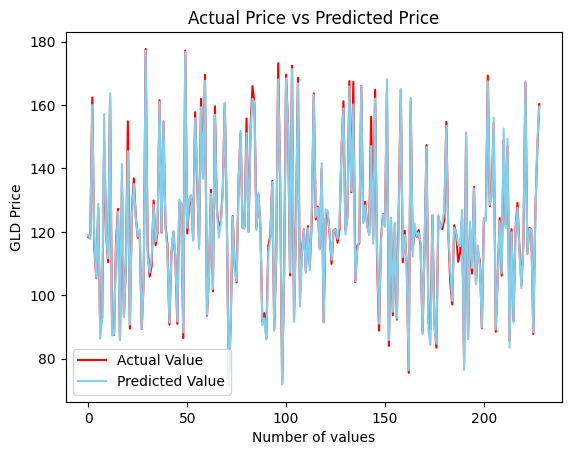

In [21]:
plt.plot(y_test, color='Red', label = 'Actual Value')
plt.plot(test_data_prediction, color='skyblue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [43]:
input_data = np.array([[1447.160034,	84.860001,	78.470001,	15.180	]])
predicted_price=regressor.predict(scaler.transform(input_data))

print(f"Predicted Gold Price: {predicted_price}")

Predicted Gold Price: [151.66041921]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
import pickle

In [45]:
pickle.dump(regressor,open('regmodel.pkl','wb'))

In [46]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [47]:
pickled_model.predict(input_data)

array([151.66250254])